# Multiple Linear Regeression:
Used to find B0,B1,B2.........BN
y = B0 + B1*x1 + B2*x2 + B3*x3........BN*xN :
Unlike linear regression , y doesnt depend on 2 values rather it depends on n+1 values(inputs)


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Basic level problem for understanding

In [2]:
a,b=make_regression(n_samples=500,n_features=2,n_targets=1,n_informative=2,noise=50)#creating a random dataset with 2 input features 

In [3]:
df=pd.DataFrame({"input1":a[:,0],"input2":a[:,1],"output":b[:]})
df

,input1,input2,output
0,-1.077387,-1.118756,86.997281
1,-1.334049,-1.911206,-30.902890
2,-1.351783,-0.376629,-8.811934
3,0.179935,-0.684887,-23.127893
4,-0.065161,0.005597,30.511460
...,...,...,...
495,-0.771013,0.268863,-44.453981
496,0.174791,0.245196,79.920819
497,1.268719,-0.388498,25.421309
498,-1.435932,1.406467,37.377740


In [4]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42) #Split the datan into train and test 

In [6]:
model=LinearRegression()

In [7]:
model.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred=model.predict(x_test)
y_pred

array([-19.71611305, -24.87492216, -18.0011687 , -10.34522303,
       -51.64345912, -10.44609001, -11.81264534,   1.96251346,
        14.58608696, -28.05958257, -23.97530949,  16.81373848,
        17.68822325,  -0.52453274, -42.02014979,   6.10848581,
         1.71265998,   4.86613096,   7.38370648,  35.29271985,
         0.84998231,   7.93068419, -13.07137647,  10.95970467,
        21.62021403,  24.48420337,  -4.94369306, -25.12343978,
        -8.0735642 , -14.27818562, -10.53074167, -26.81414446,
        10.56390175, -21.80522262, -13.40651008,  16.65034267,
       -24.23957628, -14.07082989, -40.67027901,  -8.44111681,
        -5.76468244,   5.61054704,   0.54761043, -14.84066125,
        24.89855671, -15.77262236, -27.65940766, -24.41632579,
       -10.69196961,   9.84032321,  -2.69080472,  11.98655287,
        -9.34910922, -13.69201063,  10.42478285,  11.60205352,
       -10.20261443, -13.1558863 , -27.19445599, -23.85195937,
        -5.05703071,  -8.00831107, -18.27012846,  16.19

# To use random inputs and predict for output

In [10]:
inp_1=float(input("Enter input 1"))
inp_2=float(input("Enter input 2"))
model.predict([[inp_1,inp_2]])

Enter input 1 12.43
Enter input 2 7.33


C:\Users\Anjaney\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([189.85224309])

# 3D VISUALIZATION OF MULTIPLE REGRESSION:
Only appliacble when model has 2 or less than 2 input features else hyperplane will be the regression line which cannot Be interpreted 

C:\Users\Anjaney\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


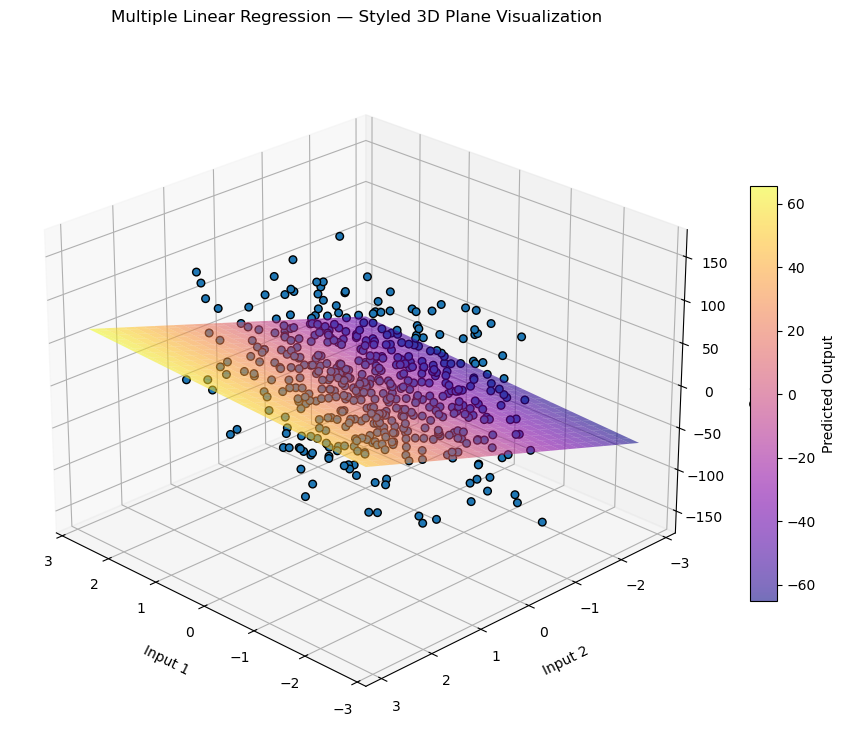

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x1 = df["input1"].to_numpy()
x2 = df["input2"].to_numpy()
y  = df["output"].to_numpy()
x1_range = np.linspace(x1.min(), x1.max(), 60)
x2_range = np.linspace(x2.min(), x2.max(), 60)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Predict using YOUR trained model
grid_points = np.column_stack([X1.ravel(), X2.ravel()])
Z = model.predict(grid_points).reshape(X1.shape)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d")

#  Regression Plane (PLASMA STYLE) 
surface = ax.plot_surface(
    X1, X2, Z,
    cmap="plasma",
    alpha=0.575,            
    linewidth=0,
    antialiased=True
)


ax.scatter(
    x1, x2, y,
    s=30,
    alpha=1.0,
    edgecolors="black"
)

# ---- Labels ----
ax.set_xlabel("Input 1", labelpad=10)
ax.set_ylabel("Input 2", labelpad=10)
ax.set_zlabel("Output", labelpad=10)

ax.set_title(
    "Multiple Linear Regression — Styled 3D Plane Visualization",
    pad=18
)

# ---- View Angle (IMPORTANT) ----
ax.view_init(elev=25, azim=135)

# ---- Colorbar ----
cbar = fig.colorbar(
    surface,
    ax=ax,
    shrink=0.6,
    aspect=15
)
cbar.set_label("Predicted Output")

plt.show()


# Regression metrics

In [12]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean squared error:",mse)
print("coefficient of determination:",r2)
print("Root mean square error:",rmse)

Mean squared error: 2606.6312935354163
coefficient of determination: 0.19805284192912864
Root mean square error: 51.05517891003239


# Interpretation of the results:
In the above example of multiple linear regression, a synthetic dataset of 500 samples was generated with 2 input features, 1 target variable, and 2 informative features using make_regression.
Gaussian noise with a standard deviation of 50 was added to the target variable, which means that each true output value deviates randomly by approximately ±50 units from the underlying linear relationship.

Since the irreducible error introduced by noise has a standard deviation of 50, the root mean squared error (RMSE) of a well-trained model is expected to be close to this value. The calculated RMSE of approximately 51 is therefore consistent with the noise level, indicating that the model has learned the underlying relationship effectively.

Additionally, the coefficient of determination (R²) is around 0.70, which implies that the model explains approximately 70% of the variance in the target variable. The remaining variance is primarily due to random noise, which cannot be learned by any regression model.

# Intermediate level problem on linear regrerssion
In this problem we can handle categorical data of "location" by one hot encoding and we need to handle missing values in order to train the model on multiple regression.Also as the input features are more  than two, we cannot visualize the regression line.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.impute import SimpleImputer
rng = np.random.default_rng(42)
n = 600

# numeric features
area = rng.normal(1200, 350, n).clip(300, 3500)           # sqft
bedrooms = rng.integers(1, 6, n)                          # 1-5
age = rng.integers(0, 50, n)                              # years
distance = rng.normal(12, 6, n).clip(0.5, 40)             # km from city center

# categorical feature
location = rng.choice(["prime", "average", "outskirts"], size=n, p=[0.25, 0.55, 0.20])

# location effect
loc_effect = np.select(
    [location == "prime", location == "average", location == "outskirts"],
    [35, 10, -15]
)

# target (price in lakhs) with noise
noise = rng.normal(0, 12, n)  # moderate noise
price = (
    0.08 * area
    + 12 * bedrooms
    - 0.5 * age
    - 1.2 * distance
    + loc_effect
    + noise
)

df = pd.DataFrame({
    "area_sqft": area,
    "bedrooms": bedrooms,
    "age_years": age,
    "distance_km": distance,
    "location": location,
    "price_lakhs": price
})

# add some missing values (realistic)
for col in ["area_sqft", "distance_km"]:
    idx = rng.choice(df.index, size=20, replace=False)
    df.loc[idx, col] = np.nan





In [14]:
df.head()


,area_sqft,bedrooms,age_years,distance_km,location,price_lakhs
0,1306.650978,2,4,11.154073,prime,156.355646
1,836.005563,3,12,21.190673,prime,99.082620
2,1462.657919,1,22,18.045065,prime,112.052875
3,1529.197651,4,8,10.460075,average,171.806386
4,517.137684,4,5,NaN,average,90.547273


In [15]:
x=df.iloc[:,0:5]
y=df.iloc[:,5]

In [16]:
x = pd.get_dummies(x, columns=["location"], drop_first=True)
x_columns=x.columns

In [17]:
imputer = SimpleImputer(strategy="mean")
x = imputer.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
model=LinearRegression()

In [20]:
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(x_test)
pd.DataFrame({"Price":y_pred[:]})

,Price
0,76.422630
1,156.730343
2,105.244376
3,135.880048
4,105.672440
...,...
175,94.291932
176,129.096565
177,132.319915
178,137.109170


# To predict individual values

In [22]:
# X_columns = columns from training encoded X
# imputer = fitted imputer
# model = trained LinearRegression model

new_house = pd.DataFrame([{
    "area_sqft": 1808,
    "bedrooms": 11,
    "age_years": 2,
    "distance_km": 3.154073,
    "location": "prime"
}])

new_house_enc = pd.get_dummies(new_house, columns=["location"], drop_first=True)
new_house_enc = new_house_enc.reindex(columns=x_columns, fill_value=0)

new_house_ready = imputer.transform(new_house_enc)

pred = model.predict(new_house_ready)
print("Predicted price (lakhs):", pred[0])

Predicted price (lakhs): 278.7607992302974


# Regression Metrics

In [23]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean squared error:",mse)
print("coefficient of determination:",r2)
print("Root mean square error:",rmse)

Mean squared error: 157.1618612421407
coefficient of determination: 0.9083823525125241
Root mean square error: 12.53642138898261
